In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
from dataproject import NyboligScraper
from dataproject import NyboligAnalysis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import seaborn as sns
import statsmodels.api as sm

# Scraping data

First we need to scrape the data from the internet. The data is scraped from https://www.nybolig.dk/. To know how many pages is possible to scrape you can call the get_pages function of the following property types:

**All**: ''
**Andelsbolig**: 'andelsbolig'
**Ejerlejlighed**: 'ejerlejlighed'
**Sommerhusgrunde**: 'fritidsgrund'
**Grunde**: 'helaarsgrund'
**Hus**: 'hus'
**Landejendomme**: 'landejendom'
**Rækkehuse**:  'raekkehus'
**Sommerhuse**: 'sommerhus'
**Villalejligheder**:   'villalejlighed'


The number of pages that you choose will determine the size of the dataset.

In [19]:
scraper = NyboligScraper()
scraper.get_pages(property_type='')


Total number of pages: 2223


Next, we need to identify what property types and how many pages we want to work with. To do this you can call the scraper.scrape_data_nybolig(self, num_pages, property_type=None, file_name=None) function. This will save the desired data into a CSV file that we will be able to work with.

In [20]:
scraper.scrape_data_nybolig(num_pages=5, property_type='sommerhus', file_name='dataprojekt_data')

# Accessing Data

Now that we have created the dataset we need to access it. To do this please provide the path of this dictionary with the filename.

In [21]:
file_path = 'dataprojekt_data.csv'
data = pd.read_csv('dataprojekt_data.csv')
print(data.head())


                                    address   postcode        city    price  \
0              Vandflodvej 25, 6857 Blåvand       6857     Blåvand  3395000   
1  Drejet 36D, Spodsbj Drej, 5900 Rudkøbing       5900   Rudkøbing  1845000   
2  Marielyst Strandpark 46, 4873 Væggerløse       4873  Væggerløse  1995000   
3                     Dillet 7, 4874 Gedser       4874      Gedser  1775000   
4             Hjelmvej 13, Elsegårde Strand  Elsegårde      Strand  1298000   

           type  rooms  size_1  size_2  
0  Fritidsbolig      5     178     NaN  
1  Fritidsbolig      4      83     NaN  
2  Fritidsbolig      5     115     NaN  
3  Fritidsbolig      4      85     NaN  
4  Fritidsbolig      3      40     NaN  


# OLS Regression

We'll create the model with 'price' as the dependent variable, and 'size_1' and 'rooms' as the independent variables. Then, we'll fit the model to the data and display the results.

In [22]:
# Define the independent and dependent variables
X = data[['size_1', 'rooms']]
y = data['price']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     13.41
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           7.32e-06
Time:                        15:47:05   Log-Likelihood:                -1550.9
No. Observations:                  99   AIC:                             3108.
Df Residuals:                      96   BIC:                             3116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.871e+05   6.06e+05      0.969      0.3

In [23]:
# Define the independent and dependent variables
X = data[['size_1']]
y = data['price']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     26.80
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.22e-06
Time:                        15:47:05   Log-Likelihood:                -1551.0
No. Observations:                  99   AIC:                             3106.
Df Residuals:                      97   BIC:                             3111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.723e+05   4.05e+05      0.919      0.3

Visualising the relationshop between House price vs size and price and price vs rooms. This will give an indication of whether there is a correlation, which of course is expected.

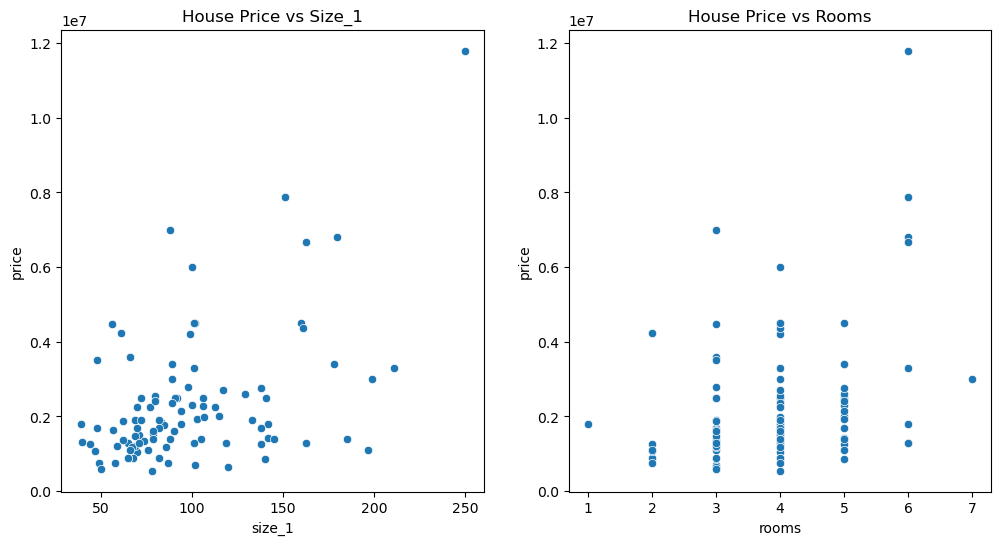

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='size_1', y='price', data=data)
plt.title('House Price vs Size_1')

plt.subplot(1, 2, 2)
sns.scatterplot(x='rooms', y='price', data=data)
plt.title('House Price vs Rooms')

plt.show()


In [25]:
# Summary statistics for house prices
mean_price = data['price'].mean()
median_price = data['price'].median()
std_dev_price = data['price'].std()

# Summary statistics for size_1
mean_size_1 = data['size_1'].mean()
median_size_1 = data['size_1'].median()
std_dev_size_1 = data['size_1'].std()

# Summary statistics for rooms
mean_rooms = data['rooms'].mean()
median_rooms = data['rooms'].median()
std_dev_rooms = data['rooms'].std()


# How does location affect the price?

Mean price for each city

In [26]:
# Group the data by city and calculate the mean price
mean_prices_by_city = data.groupby('city')['price'].mean().reset_index()
mean_prices_by_city = mean_prices_by_city.sort_values('price', ascending=False)


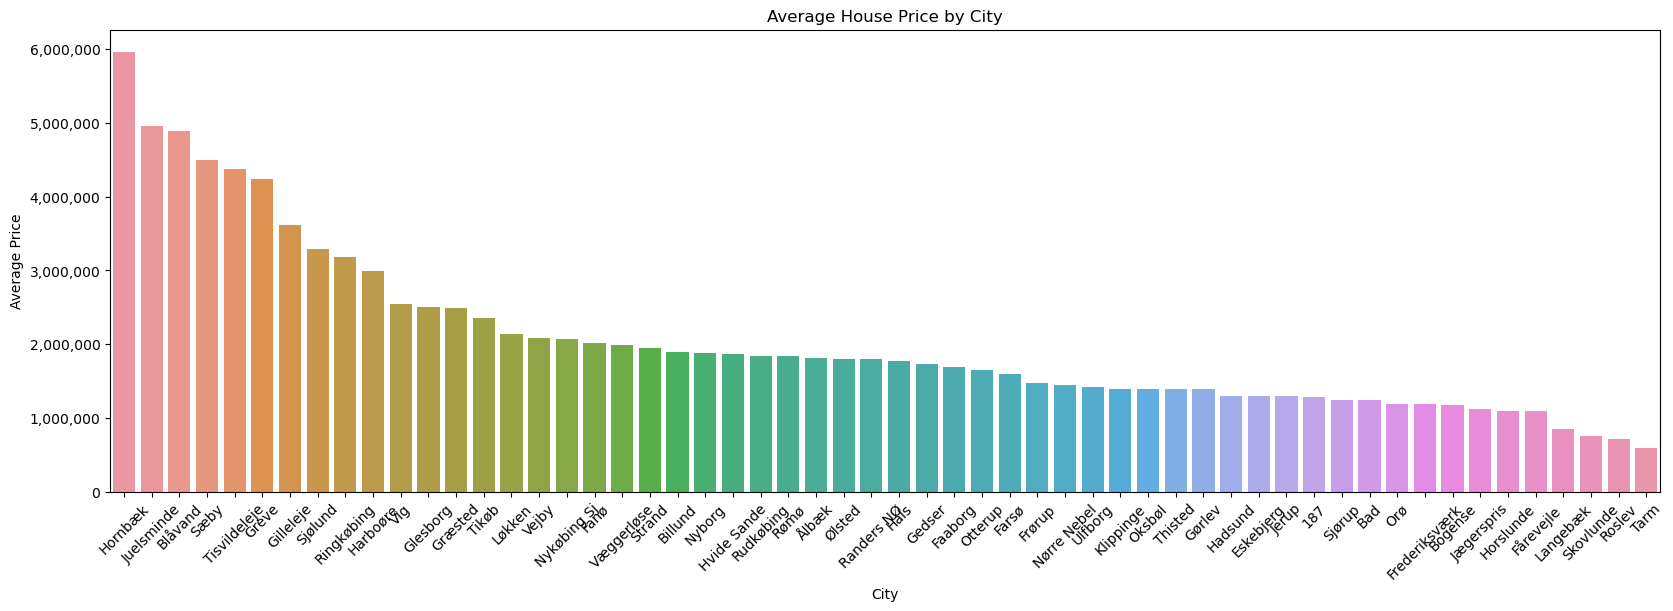

In [27]:
from matplotlib.ticker import FuncFormatter

def price_formatter(x, _):
    return f'{int(x):,}'

formatter = FuncFormatter(price_formatter)

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='city', y='price', data=mean_prices_by_city)
plt.title('Average House Price by City')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('City')

ax.yaxis.set_major_formatter(formatter)
plt.show()


Mean price each postcode

In [28]:
# Group the data by postcode and calculate the mean price
mean_prices_by_postcode = data.groupby('postcode')['price'].mean().reset_index()
mean_prices_by_postcode = mean_prices_by_postcode.sort_values('price', ascending=False)


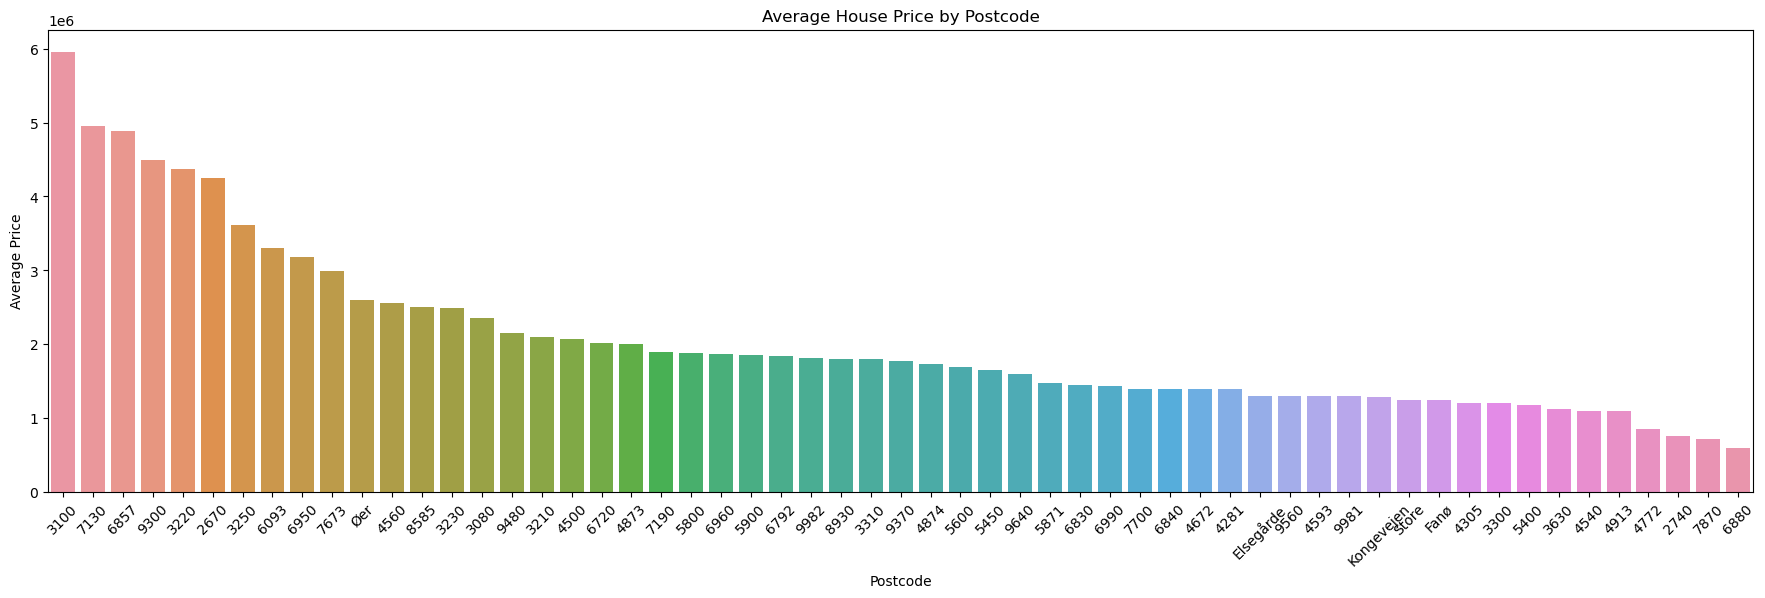

In [29]:
plt.figure(figsize=(22, 6))
sns.barplot(x='postcode', y='price', data=mean_prices_by_postcode)
plt.title('Average House Price by Postcode')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Postcode')
plt.show()


# Comparing the highest and lowest price city: Hornbæk and Tarm

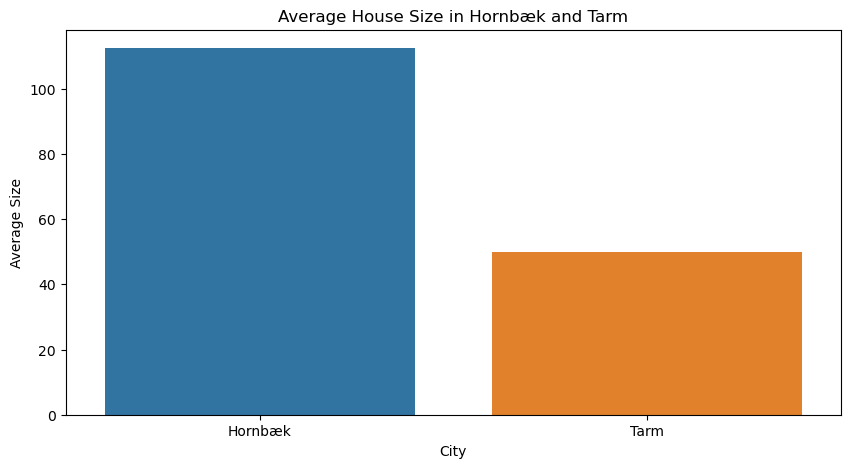

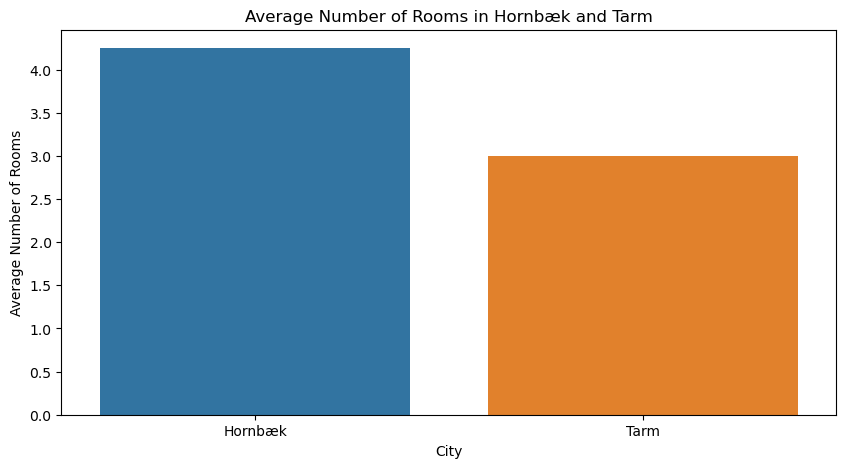

In [30]:
# Filter the dataset for Hornbæk and Tarm 
hornbæk_data = data[data['city'] == 'Hornbæk']
tarm_data = data[data['city'] == 'Tarm']


# Calculate the average size and number of rooms for houses in Hornbæk and Tarm
hornbæk_mean_size = hornbæk_data['size_1'].mean()
tarm_mean_size = tarm_data['size_1'].mean()

hornbæk_mean_rooms = hornbæk_data['rooms'].mean()
tarm_mean_rooms = tarm_data['rooms'].mean()

# Visualization
# Create bar charts to compare the average size and number of rooms between houses in Hornbæk and Tarm
# Average size comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=['Hornbæk', 'Tarm'], y=[hornbæk_mean_size, tarm_mean_size])
plt.title('Average House Size in Hornbæk and Tarm')
plt.ylabel('Average Size')
plt.xlabel('City')
plt.show()

# Average number of rooms comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=['Hornbæk', 'Tarm'], y=[hornbæk_mean_rooms, tarm_mean_rooms])
plt.title('Average Number of Rooms in Hornbæk and Tarm')
plt.ylabel('Average Number of Rooms')
plt.xlabel('City')
plt.show()


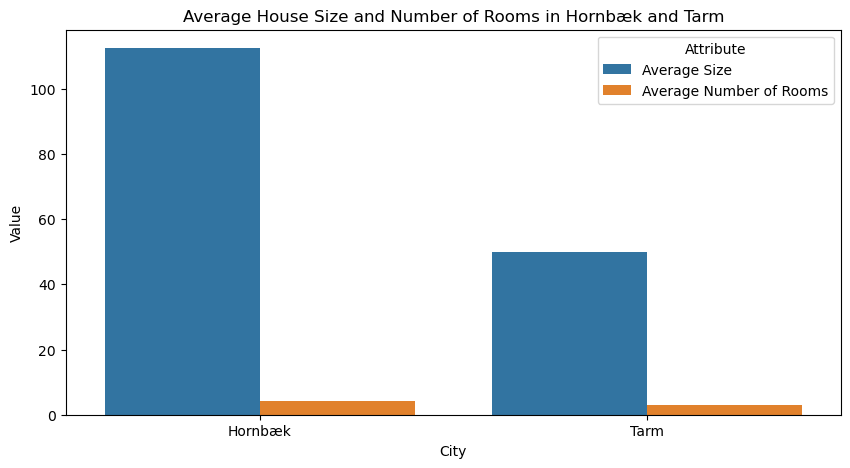

In [31]:
comparison_data = pd.DataFrame({
    'City': ['Hornbæk', 'Tarm'],
    'Average Size': [hornbæk_mean_size, tarm_mean_size],
    'Average Number of Rooms': [hornbæk_mean_rooms, tarm_mean_rooms]
})


melted_data = comparison_data.melt(id_vars='City', var_name='Attribute', value_name='Value')


plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='Value', hue='Attribute', data=melted_data)
plt.title('Average House Size and Number of Rooms in Hornbæk and Tarm')
plt.ylabel('Value')
plt.xlabel('City')
plt.show()


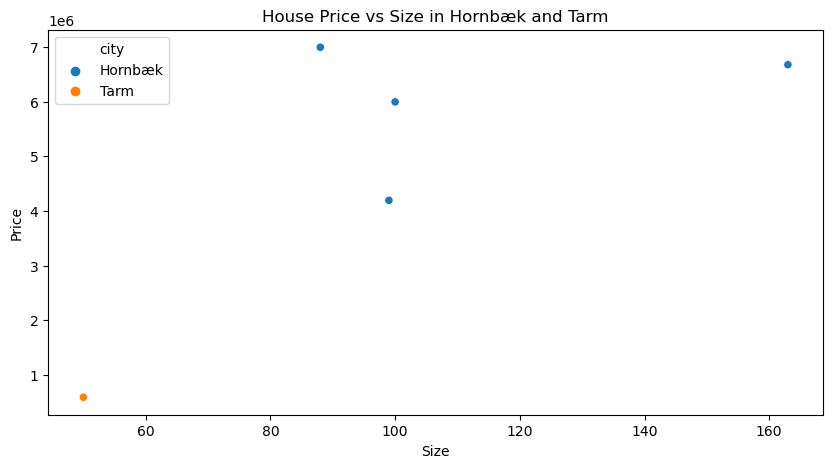

In [32]:
combined_data = pd.concat([hornbæk_data, tarm_data])
plt.figure(figsize=(10, 5))
sns.scatterplot(x='size_1', y='price', hue='city', data=combined_data)
plt.title('House Price vs Size in Hornbæk and Tarm')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


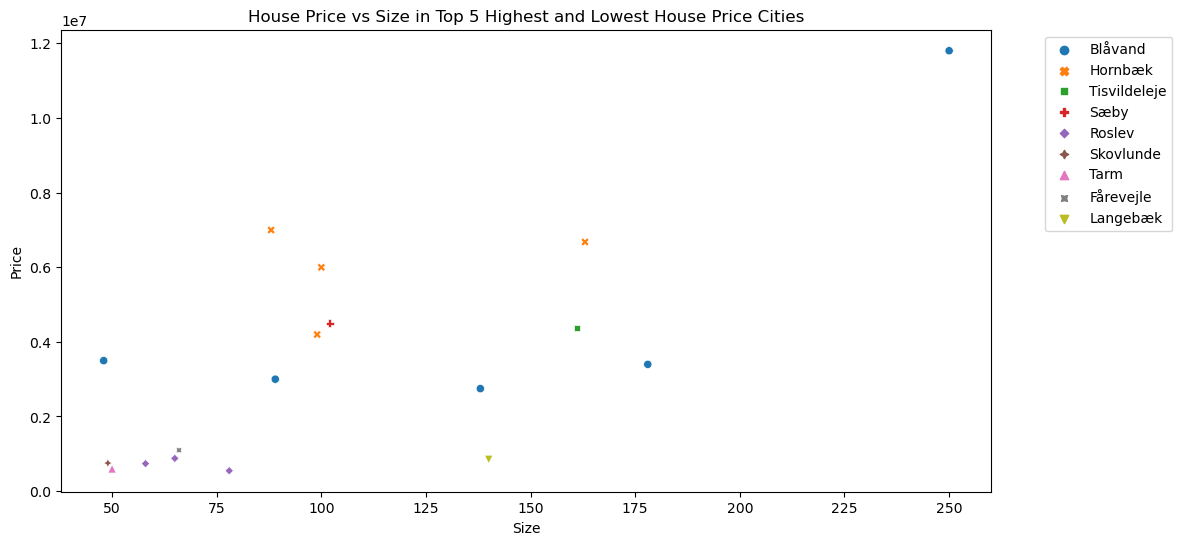

In [33]:
highest_price_cities = ['Hornbæk', 'Julesminde', 'Blåvand', 'Sæby', 'Tisvildeleje']
lowest_price_cities = ['Tarm', 'Roslev', 'Skovlunde', 'Langebæk', 'Fårevejle']

highest_data = data[data['city'].isin(highest_price_cities)]
lowest_data = data[data['city'].isin(lowest_price_cities)]

combined_highest_lowest_data = pd.concat([highest_data, lowest_data])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='size_1', y='price', hue='city', style='city', data=combined_highest_lowest_data)
plt.title('House Price vs Size in Top 5 Highest and Lowest House Price Cities')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


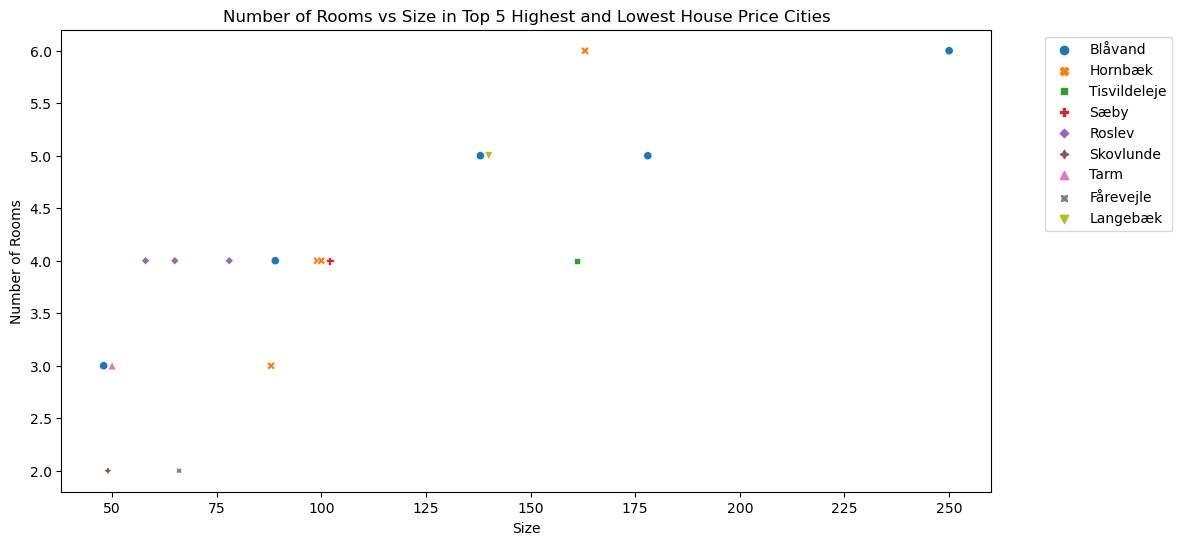

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='size_1', y='rooms', hue='city', style='city', data=combined_highest_lowest_data)
plt.title('Number of Rooms vs Size in Top 5 Highest and Lowest House Price Cities')
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
